<a href="https://colab.research.google.com/github/L4ncelot1024/Learn_Deep_Learning_Le_Wagon/blob/main/Day3/LiveCode_Financial_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Price Forecasting

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

## Downloading the data

Here we use the pandas data reader to directly download data from yahoo finance !

In [13]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'AF.PA', 'TOT']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)


#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock, 'yahoo', start, end) #was globals()[stock]

In [14]:
print(AAPL.shape)
print(TOT.head())
TOT.tail()

(252, 6)
                 High        Low       Open      Close     Volume  Adj Close
Date                                                                        
2020-05-19  36.080002  35.340000  36.020000  35.349998  3637900.0  32.697361
2020-05-20  36.900002  36.130001  36.470001  36.490002  2874000.0  33.751816
2020-05-21  36.549999  35.470001  36.410000  36.040001  1832600.0  33.335587
2020-05-22  36.060001  35.330002  36.029999  36.020000  1442200.0  33.317085
2020-05-26  36.889999  36.419998  36.720001  36.520000  1554000.0  33.779568


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-05-12,47.770000,46.580002,46.580002,46.750000,2364900.0,46.750000
2021-05-13,47.189999,46.430000,46.610001,46.950001,2171500.0,46.950001
2021-05-14,48.759998,47.889999,47.900002,48.730000,1928000.0,48.730000
2021-05-17,48.779999,47.860001,47.889999,48.709999,2154600.0,48.709999
2021-05-18,48.990002,48.040001,48.869999,48.040001,1529600.0,48.040001


In [15]:
#marche pas a revoir 

def get_symbol(symbol):
    url = "http://d.yimg.com/autoc.finance.yahoo.com/autoc?query={}&region=1&lang=en".format(symbol)

    result = requests.get(url).json()

    for x in result['ResultSet']['Result']:
        if x['symbol'] == symbol:
            return x['name']

#company_list = [globals()[val] for val in tech_list]
company_name = [get_symbol(comp) for comp in tech_list]

for company, ticker in zip(company_name, tech_list):
    globals()[ticker]["company_name"] = company_name
    
df = pd.concat(tech_list, axis=0)
df.tail(10)

ValueError: ignored

In [16]:
company_list = [globals()[val] for val in tech_list]
#company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, tech_list):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2021-05-05,47.000000,46.430000,46.430000,46.950001,916200.0,46.950001,TOT
2021-05-06,47.610001,46.730000,47.020000,47.610001,1485800.0,47.610001,TOT
2021-05-07,47.910000,46.770000,46.849998,47.900002,1987100.0,47.900002,TOT
2021-05-10,48.160000,47.270000,48.020000,47.270000,2077400.0,47.270000,TOT
2021-05-11,47.360001,46.560001,46.820000,46.560001,2014800.0,46.560001,TOT
2021-05-12,47.770000,46.580002,46.580002,46.750000,2364900.0,46.750000,TOT
2021-05-13,47.189999,46.430000,46.610001,46.950001,2171500.0,46.950001,TOT
2021-05-14,48.759998,47.889999,47.900002,48.730000,1928000.0,48.730000,TOT
2021-05-17,48.779999,47.860001,47.889999,48.709999,2154600.0,48.709999,TOT


## Looking at the data

In [17]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2020-05-19,79.629997,78.252502,78.757500,78.285004,101729600.0,77.761040,AAPL
2020-05-20,79.879997,79.129997,79.169998,79.807503,111504800.0,79.273354,AAPL
2020-05-21,80.222504,78.967499,79.665001,79.212502,102688800.0,78.682327,AAPL
2020-05-22,79.807503,78.837502,78.942497,79.722504,81803200.0,79.188927,AAPL
2020-05-26,81.059998,79.125000,80.875000,79.182503,125522000.0,78.652542,AAPL


In [18]:
# Summary Stats
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,117.947580,114.891150,116.529207,116.442549,1.277841e+08,116.010471
std,16.248212,15.832271,16.180000,16.013812,5.264065e+07,16.115225
min,79.629997,78.252502,78.757500,78.285004,4.669130e+07,77.761040
25%,112.380001,108.855625,110.474373,110.415001,9.024835e+07,109.873743
50%,121.605003,118.799999,120.220001,120.215000,1.124918e+08,119.921555
75%,129.727501,126.772501,128.540001,127.950003,1.532816e+08,127.717728
max,145.089996,141.369995,143.600006,143.160004,3.743368e+08,142.704010


In [19]:
print(AAPL.index.min())
print(AAPL.index.max())

2020-05-19 00:00:00
2021-05-18 00:00:00


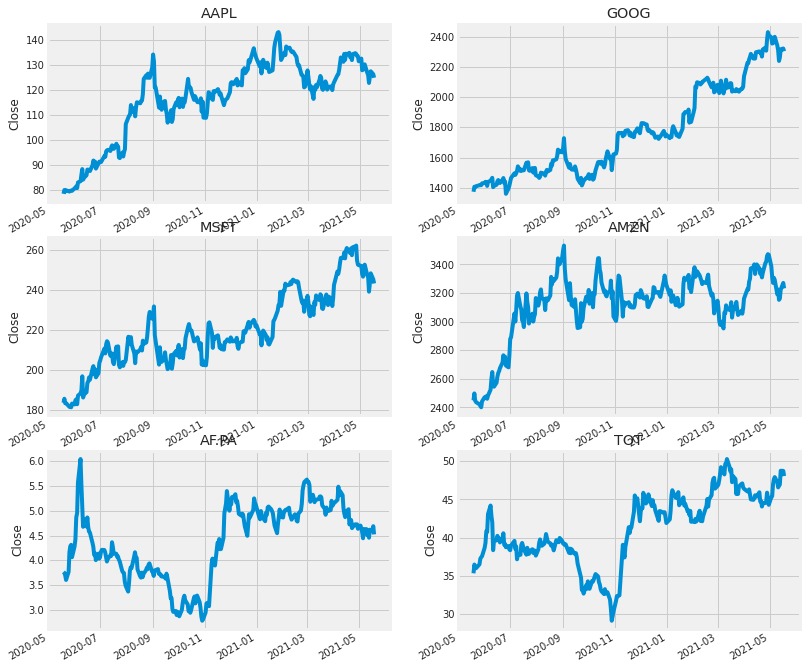

In [20]:
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Close'].plot()
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

## Baseline

How does the moving average compare with the data?

In [21]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Close'].rolling(ma).mean()

In [22]:
company.tail()

,High,Low,Open,Close,Volume,Adj Close,company_name,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,,
2021-05-12,47.770000,46.580002,46.580002,46.750000,2364900.0,46.750000,TOT,46.319000,45.6560,46.6094
2021-05-13,47.189999,46.430000,46.610001,46.950001,2171500.0,46.950001,TOT,46.495000,45.7290,46.5974
2021-05-14,48.759998,47.889999,47.900002,48.730000,1928000.0,48.730000,TOT,46.940001,45.8975,46.6056
2021-05-17,48.779999,47.860001,47.889999,48.709999,2154600.0,48.709999,TOT,47.283001,46.0370,46.5958
2021-05-18,48.990002,48.040001,48.869999,48.040001,1529600.0,48.040001,TOT,47.547001,46.2030,46.5852


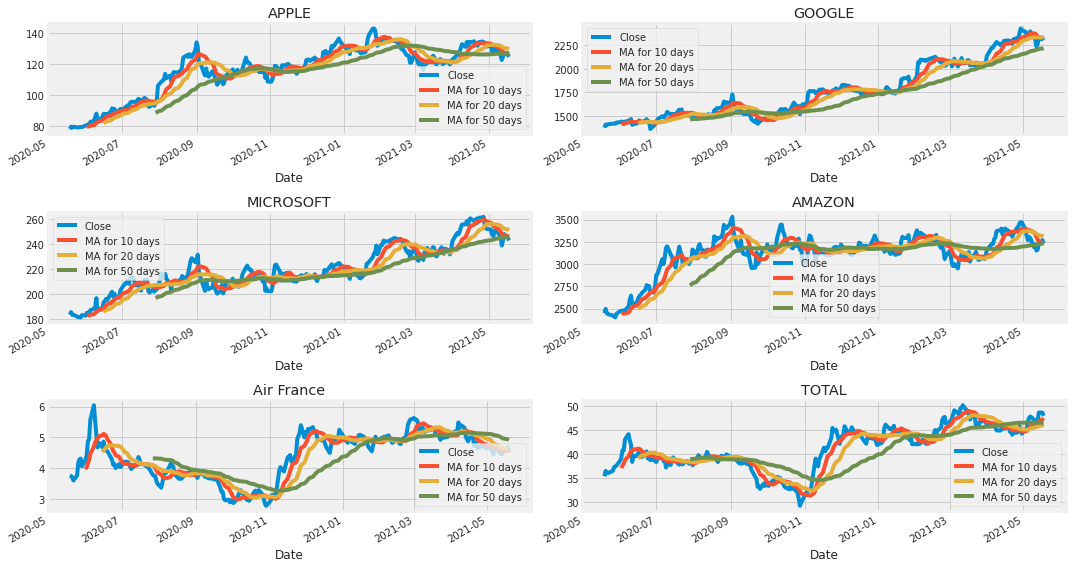

In [23]:
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

globals()['AF.PA'][['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,0])
axes[2,0].set_title('Air France')

TOT[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,1])
axes[2,1].set_title('TOTAL')

fig.tight_layout()

## Predicting the closing price

Let's try to predict the closing price of Apple !

In [26]:
df = TOT
df.tail()

,High,Low,Open,Close,Volume,Adj Close,company_name,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,,
2021-05-12,47.770000,46.580002,46.580002,46.750000,2364900.0,46.750000,TOT,46.319000,45.6560,46.6094
2021-05-13,47.189999,46.430000,46.610001,46.950001,2171500.0,46.950001,TOT,46.495000,45.7290,46.5974
2021-05-14,48.759998,47.889999,47.900002,48.730000,1928000.0,48.730000,TOT,46.940001,45.8975,46.6056
2021-05-17,48.779999,47.860001,47.889999,48.709999,2154600.0,48.709999,TOT,47.283001,46.0370,46.5958
2021-05-18,48.990002,48.040001,48.869999,48.040001,1529600.0,48.040001,TOT,47.547001,46.2030,46.5852


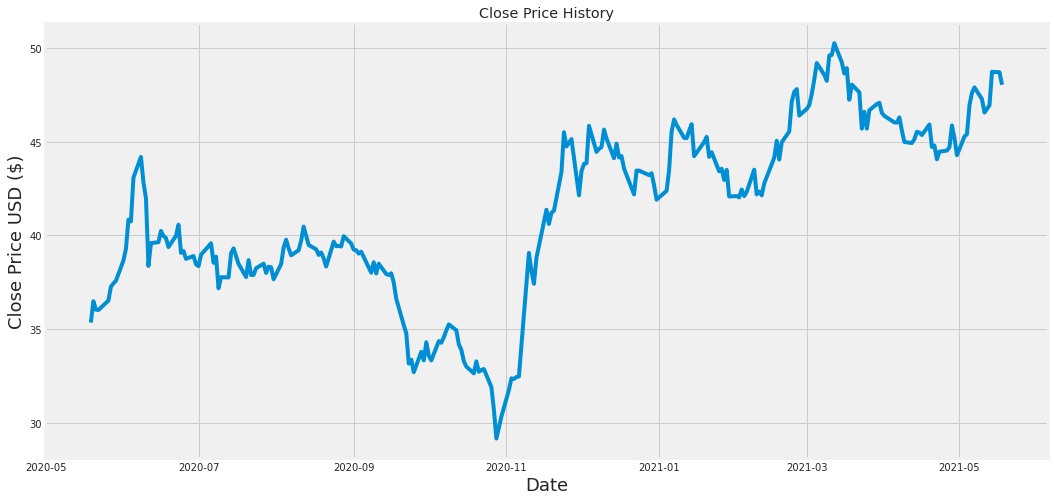

In [27]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [28]:
# We gather the feature column (the last one is our target column)
data = df[['High', 'Low', 'Open', 'Volume', 'Close']]
# Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on, we split on 80% of the data and 
# in the order
training_data_len = int(np.ceil( len(dataset) * .8 ))

In [29]:
dataset.shape

(252, 5)

### Scaling the data

In [30]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(dataset[:training_data_len])
scaled_data = scaler.transform(dataset)

print(scaled_data.shape)

training_dataset = scaled_data[:training_data_len]

print(training_dataset.shape)

(252, 5)
(202, 5)


In [31]:
dataset[:training_data_len].shape

(202, 5)

### Create the input and label data

In [32]:
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

seq_length = 60

for i in range(seq_length, len(training_dataset)):
    x_train.append(training_dataset[i-seq_length:i, :])
    y_train.append(training_dataset[i, -1]) # close is the last element
        
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], -1))
print(x_train.shape)
print(y_train.shape)

(142, 60, 5)
(142,)


In [33]:
#Create the testing data set
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
# here we don't use the scaled data since we want to compute the real rmse
y_test = dataset[training_data_len:, -1]
for i in range(seq_length, len(test_data)):
    x_test.append(test_data[i-seq_length:i, :])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], -1))

print(x_test.shape)
print(y_test.shape)

(50, 60, 5)
(50,)


In [34]:
y_test[0]

48.25

### Build and Train the Model

In [35]:
print(x_train.shape)
print(y_train.shape)

(142, 60, 5)
(142,)


In [36]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, TimeDistributed

#Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
history = model.fit(x_train, y_train, batch_size=8, epochs=10)

Epoch 1/10
18/18 [==============================] - 5s 74ms/step - loss: 0.0984
Epoch 2/10
18/18 [==============================] - 1s 70ms/step - loss: 0.0162
Epoch 3/10
18/18 [==============================] - 1s 69ms/step - loss: 0.0115
Epoch 4/10
18/18 [==============================] - 1s 68ms/step - loss: 0.0080
Epoch 5/10
18/18 [==============================] - 1s 71ms/step - loss: 0.0087
Epoch 6/10
18/18 [==============================] - 1s 75ms/step - loss: 0.0085
Epoch 7/10
18/18 [==============================] - 1s 73ms/step - loss: 0.0056
Epoch 8/10
18/18 [==============================] - 1s 73ms/step - loss: 0.0050
Epoch 9/10
18/18 [==============================] - 1s 75ms/step - loss: 0.0073
Epoch 10/10
18/18 [==============================] - 1s 72ms/step - loss: 0.0065


In [38]:
y_train.shape

(142,)

### Evaluate the Model

In [39]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

ValueError: ignored

In [40]:
predictions = model.predict(x_test)
print(predictions.shape)
# we need to format the predictions for the standard scaler
pred_reshaped = np.concatenate((np.ones((len(predictions), 4)), predictions), 1)
print(pred_reshaped.shape)
pred_reshaped = scaler.inverse_transform(pred_reshaped)
predictions = pred_reshaped[:, -1]

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

(50, 1)
(50, 5)


2.030232565659729

In [41]:
# We compute the predictions of the baseline model here
for ma_ in ma_day:
  predictions_baseline = df[-50:][f'MA for {ma_} days'].values

  rmse_baseline = np.sqrt(np.mean(((predictions_baseline - y_test) ** 2)))
  print(rmse_baseline)

1.0784757842658546
1.6366860272549988
2.0064135778235084


In [42]:
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

ValueError: ignored

In [43]:
print(x_test.shape)

(50, 60, 5)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


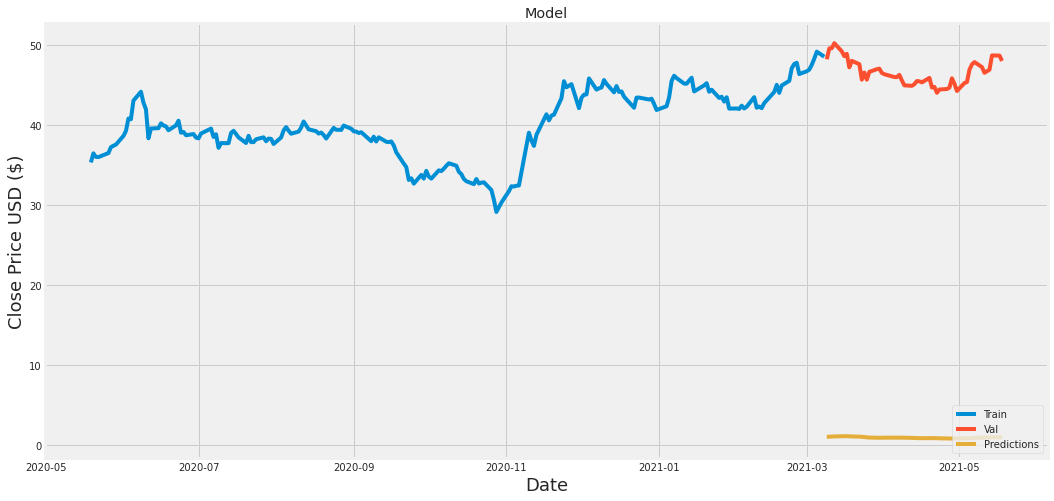

In [44]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

### Compare with Neural Prophet

In [53]:
#!git clone https://github.com/ourownstory/neural_prophet.git

In [49]:
#!cd neural_prophet

In [54]:
!ls


sample_data


In [51]:
!pip install .[live]

ERROR: Directory '.[live]' is not installable. Neither 'setup.py' nor 'pyproject.toml' found.


In [ ]:
print(data.shape)
data.head()

(253, 1)


,Close
Date,
2020-01-28,79.422501
2020-01-29,81.084999
2020-01-30,80.967499
2020-01-31,77.377502
2020-02-03,77.165001


In [ ]:
raw_training_df = data[:training_data_len]
print(raw_training_df.shape)
np_training_df = raw_training_df.reset_index().rename(columns={'Date': 'ds', 'Close': 'y'})
np_training_df.head()

(203, 1)


,ds,y
0,2020-01-28,79.422501
1,2020-01-29,81.084999
2,2020-01-30,80.967499
3,2020-01-31,77.377502
4,2020-02-03,77.165001


In [ ]:
from neuralprophet import NeuralProphet

m = NeuralProphet()
metrics = m.fit(np_training_df, freq='D')

INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 8
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 157
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:550: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")



  0%|          | 0/100 [00:00<?, ?it/s]

INFO - (NP.forecaster._lr_range_test) - learning rate range test found optimal lr: 1.23E-01
Epoch[157/157]: 100%|██████████| 157/157 [00:07<00:00, 21.26it/s, SmoothL1Loss=0.0019, MAE=3.36, RegLoss=0]


In [ ]:
np_training_df.head()

,ds,y
0,2020-01-28,79.422501
1,2020-01-29,81.084999
2,2020-01-30,80.967499
3,2020-01-31,77.377502
4,2020-02-03,77.165001


In [ ]:
np_valid_df.head()

,ds,y
0,2020-11-13,119.260002
1,2020-11-16,120.300003
2,2020-11-17,119.389999
3,2020-11-18,118.029999
4,2020-11-19,118.639999


In [ ]:
future.head()

,ds,y,t,y_scaled
0,2021-01-28,None,1.266436,NaN


In [ ]:
print(data.shape)
np_data = data.reset_index().rename(columns={'Date': 'ds', 'Close': 'y'})
np_data.head()

(253, 1)


,ds,y
0,2020-01-28,79.422501
1,2020-01-29,81.084999
2,2020-01-30,80.967499
3,2020-01-31,77.377502
4,2020-02-03,77.165001


INFO - (NP.forecaster._handle_missing_data) - 87 missing dates added.
INFO - (NP.forecaster._handle_missing_data) - 87 NaN values in column y were auto-imputed.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:550: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

Epoch[100/100]: 100%|██████████| 100/100 [00:05<00:00, 17.14it/s, SmoothL1Loss=0.000495, MAE=1.89, RegLoss=0]
WARNING - (NP.forecaster.make_future_dataframe) - Insufficient data for 253 historic forecasts, reduced to 193.
INFO - (NP.forecaster._handle_missing_data) - 113 missing dates added.
INFO - (NP.forecaster._handle_missing_data) - 113 NaN values in column y were auto-imputed.


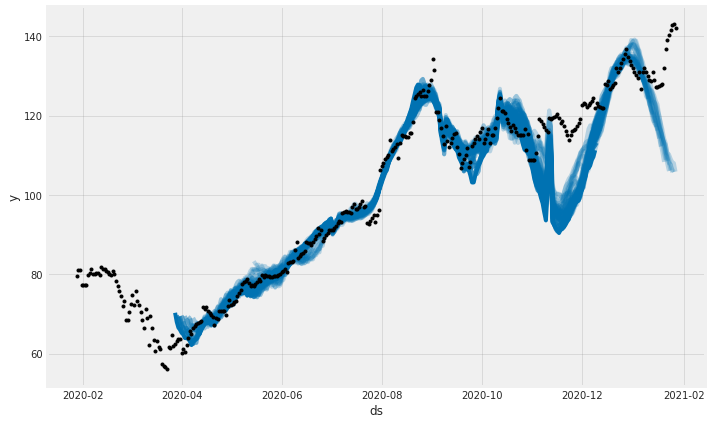

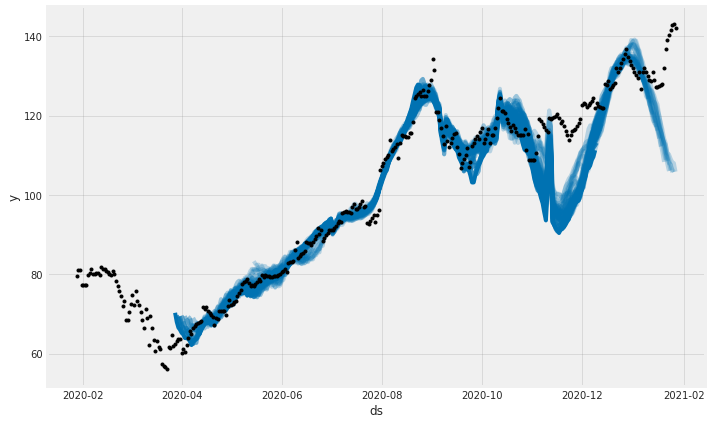

In [ ]:
model_complex = NeuralProphet(
    n_forecasts=50,
    n_lags=60, # how many days we use for the prediction
    n_changepoints=100,
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    batch_size=16,
    epochs=100,
    learning_rate=1.0,
)
model_complex = model_complex.add_country_holidays("US", mode="additive", lower_window=-1, upper_window=1)
metrics = model_complex.fit(np_training_df, freq='D')

# Here we use the entire dataset to plot prediction
all_data = model_complex.make_future_dataframe(np_data, 
                                      periods=0, 
                                      n_historic_predictions=len(np_data))
forecast = model_complex.predict(all_data)

model_complex.plot(forecast)

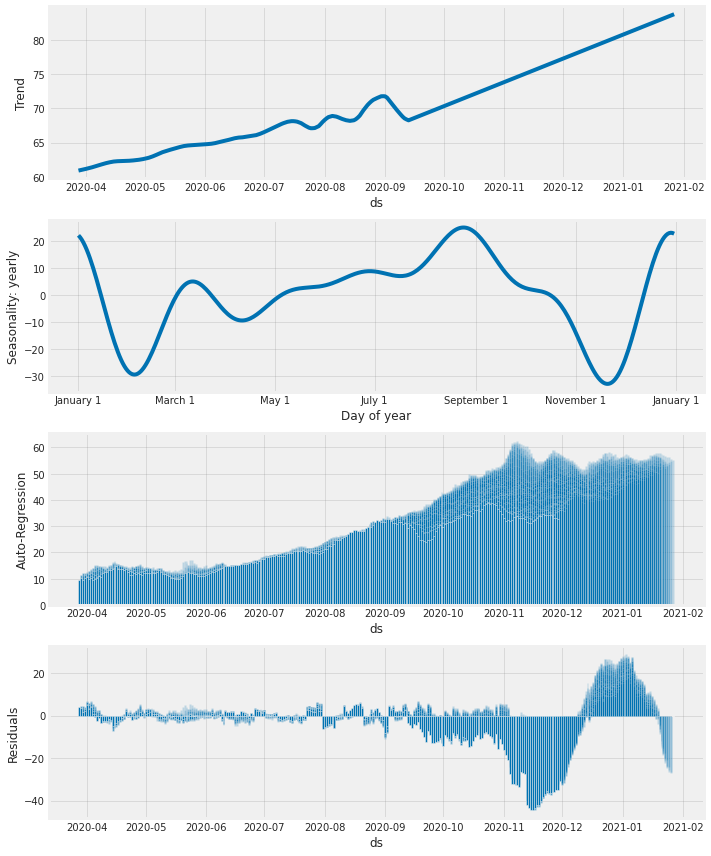

In [ ]:
neural_figure_trend = model_complex.plot_components(forecast, residuals=True)
